In [ ]:
def plot_sentiment_with_highlights_and_timeframes(daily_sentiment, title, location, columns, averages, mean_location=None, significant_points=None, timeframe=None, colors=None, save_path=None):
    """
    Plot sentiment scores with highlights and timeframes.

    Parameters:
    daily_sentiment (DataFrame): Data containing sentiment scores.
    title (str): The title of the plot.
    columns (list): The columns from the DataFrame to plot.
    averages (list): Averages for each column to plot as horizontal lines.
    mean_location (float, optional): A location's mean sentiment to be plotted as a horizontal line.
    significant_points (list of str/datetime, optional): Points to be highlighted on the plot.
    timeframe (tuple of str/datetime, optional): A timeframe to highlight on the plot.
    colors (list): Colors for each column line and average line.
    save_path (str, optional): Path to save the figure.
    """
    plt.figure(figsize=(15, 8))
    
    # Ensure colors is a list with enough colors
    if not colors or len(colors) < len(columns):
        raise ValueError("Colors list is not provided or does not have enough colors.")
    
    # Plot lines for each sentiment column
    for i, column in enumerate(columns):
        sns.lineplot(x='day', y=column, data=daily_sentiment, color=colors[i], label=f'{column.capitalize()} Sentiment')
        if averages[i] is not None:
            plt.axhline(y=averages[i], color=colors[i], linestyle='--', linewidth=2, label=f'{column.capitalize()} Mean Sentiment({averages[i]:.2f})')

    # Highlight significant points
    if significant_points:
        for point in significant_points:
            plt.scatter(daily_sentiment['day'], daily_sentiment[point], color='red', s=50, zorder=5, label='Significant Point' if point == significant_points[0] else "")

    # Highlight the timeframe
    if timeframe:
        plt.axvspan(pd.to_datetime(timeframe[0]), pd.to_datetime(timeframe[1]), color='yellow', alpha=0.3, label='Significant Period')

    # Plot mean location horizontal line
    if mean_location is not None:
        plt.axhline(y=mean_location, color='green', linestyle='--', linewidth=2, label=f'Mean Sentiment in {location} ({mean_location:.2f})')

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    sns.despine()
    plt.legend()
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, format='png', bbox_inches='tight')
    plt.show()


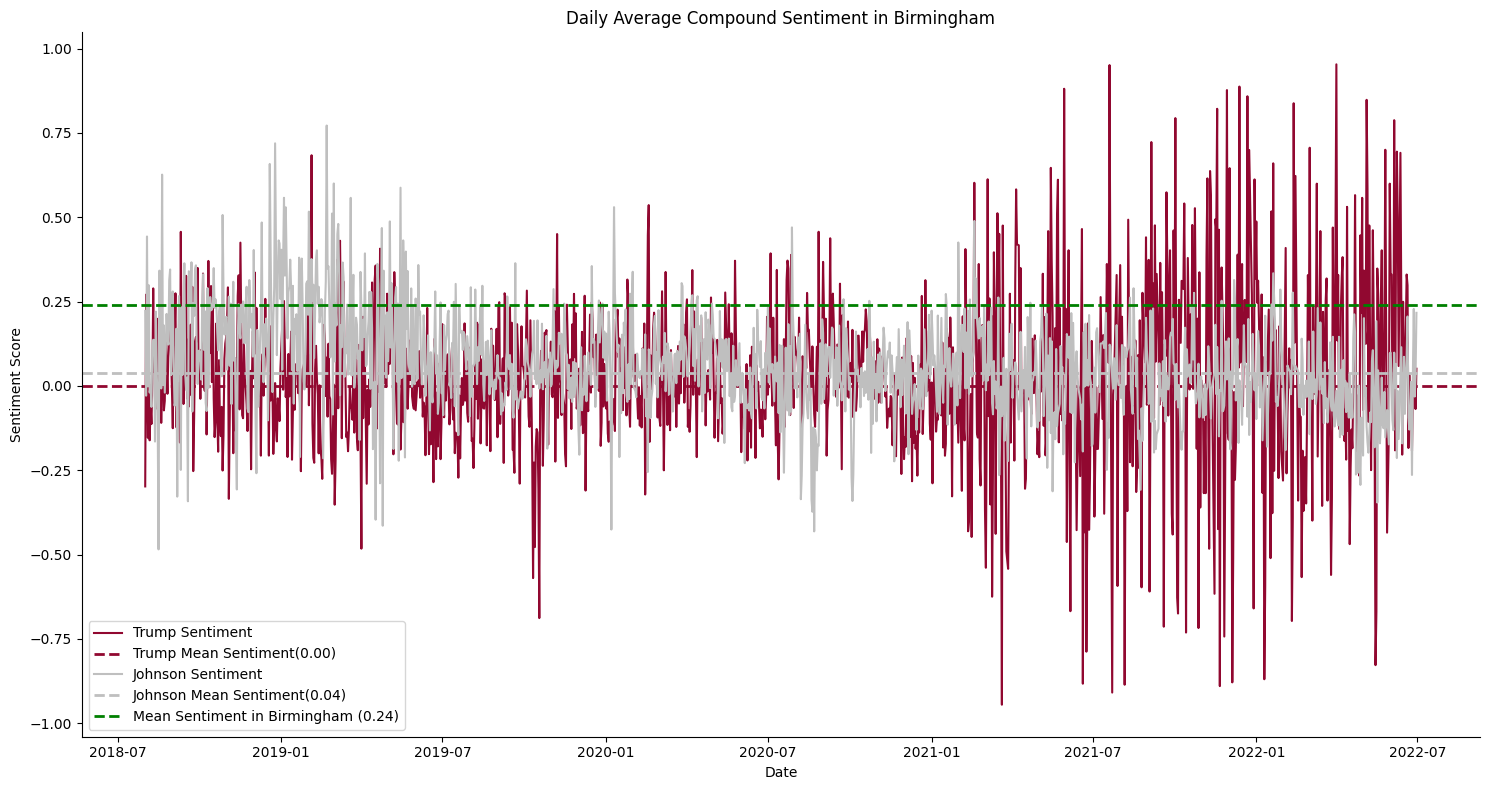

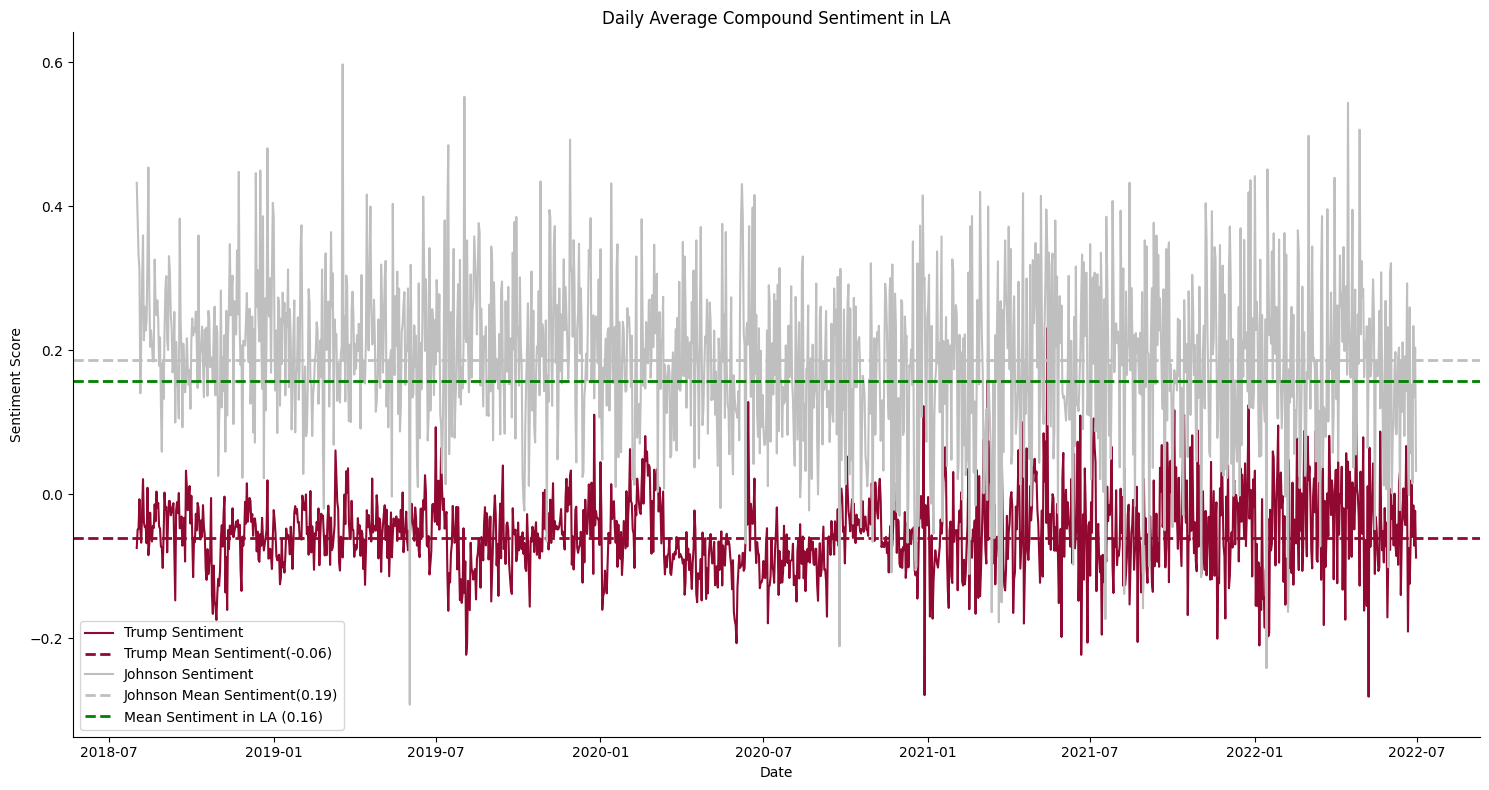

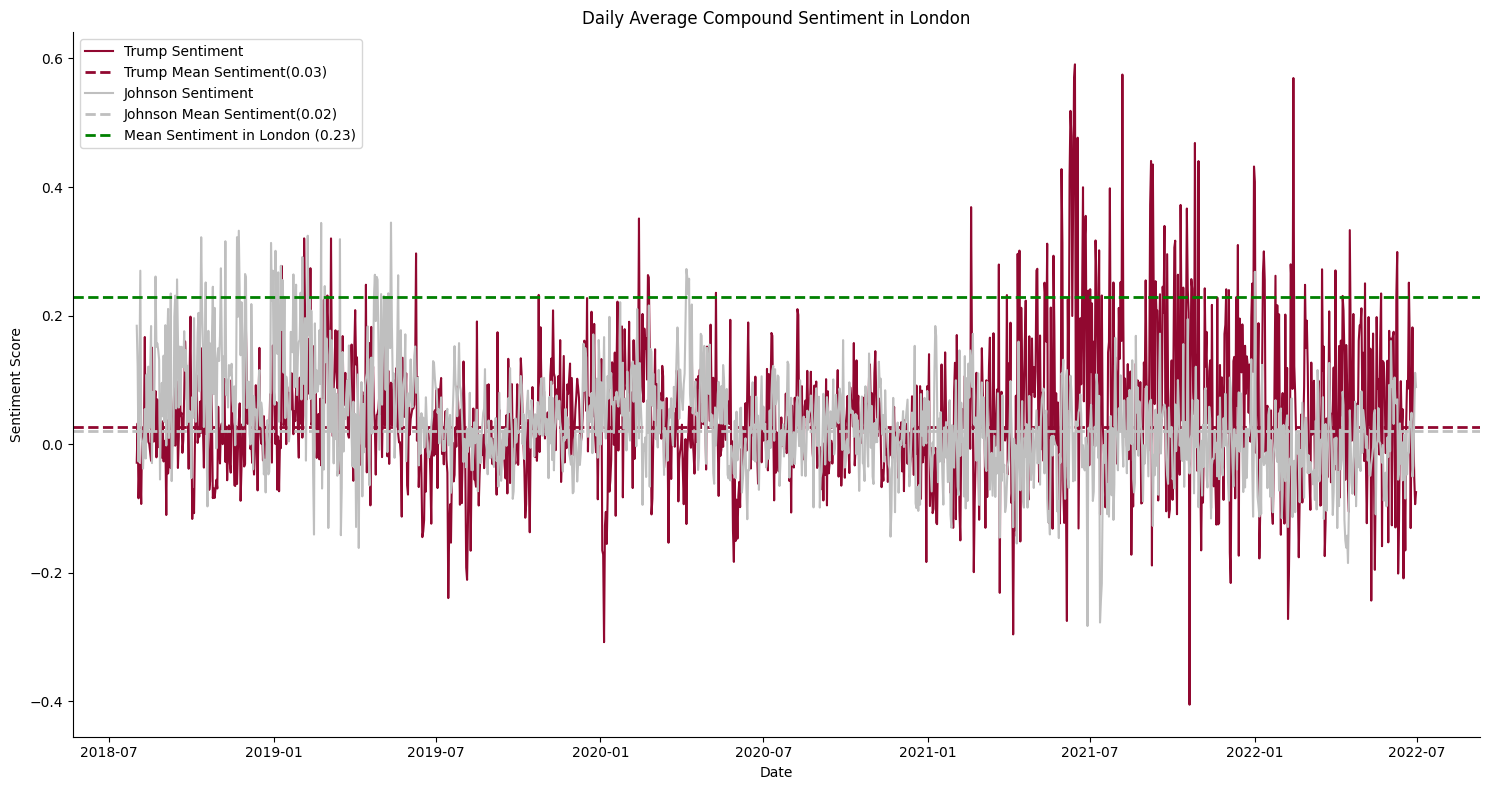

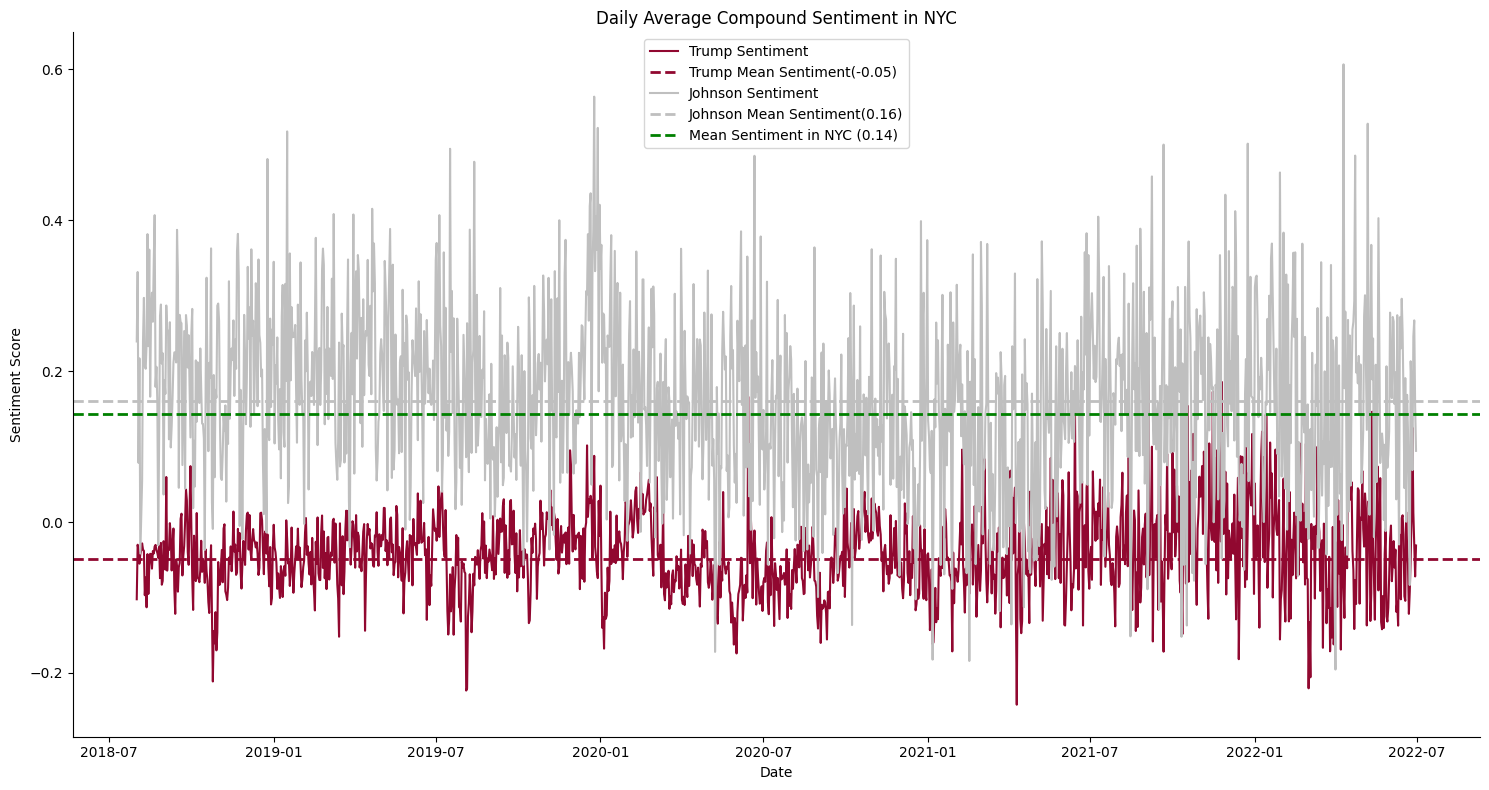

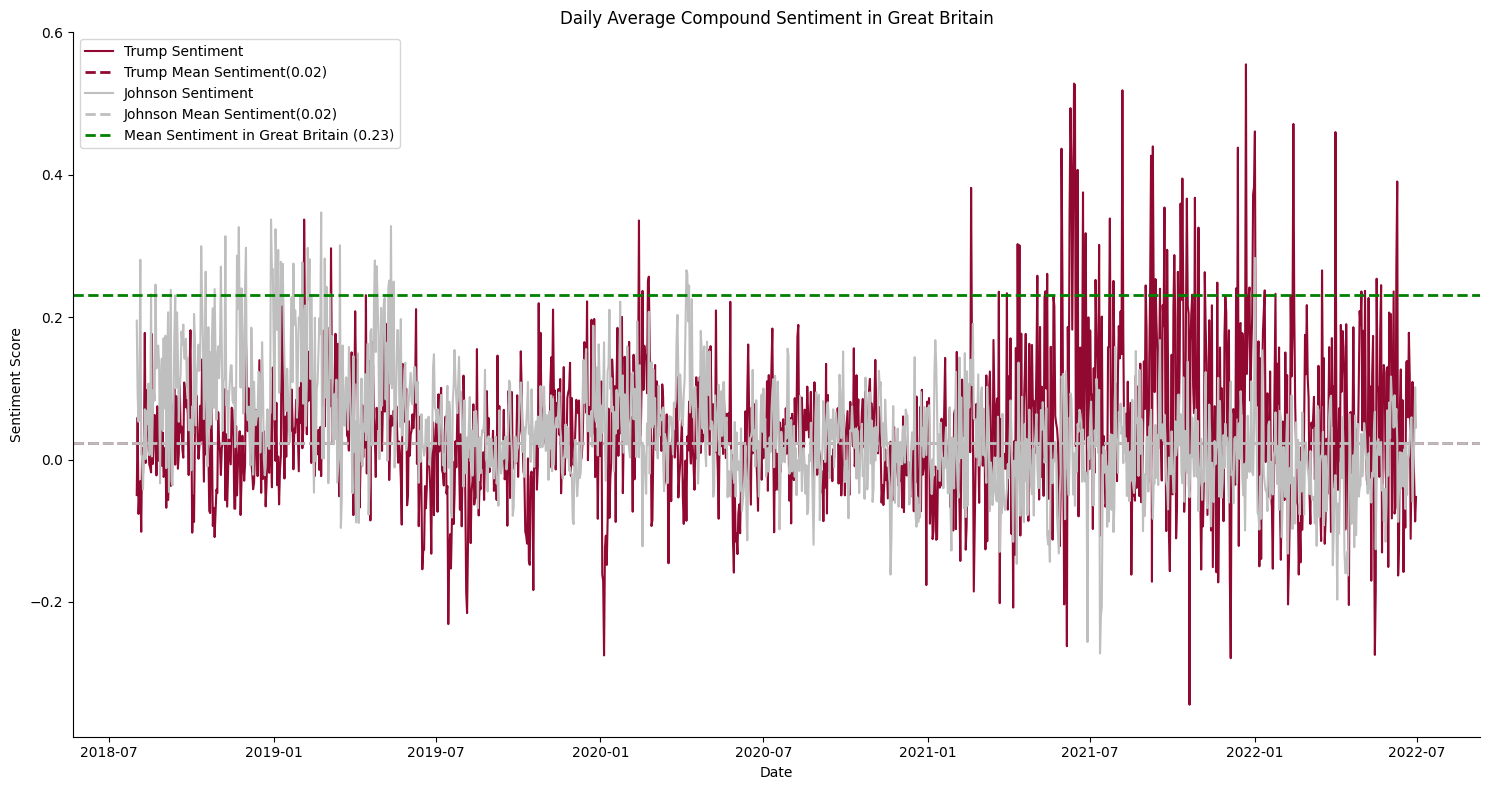

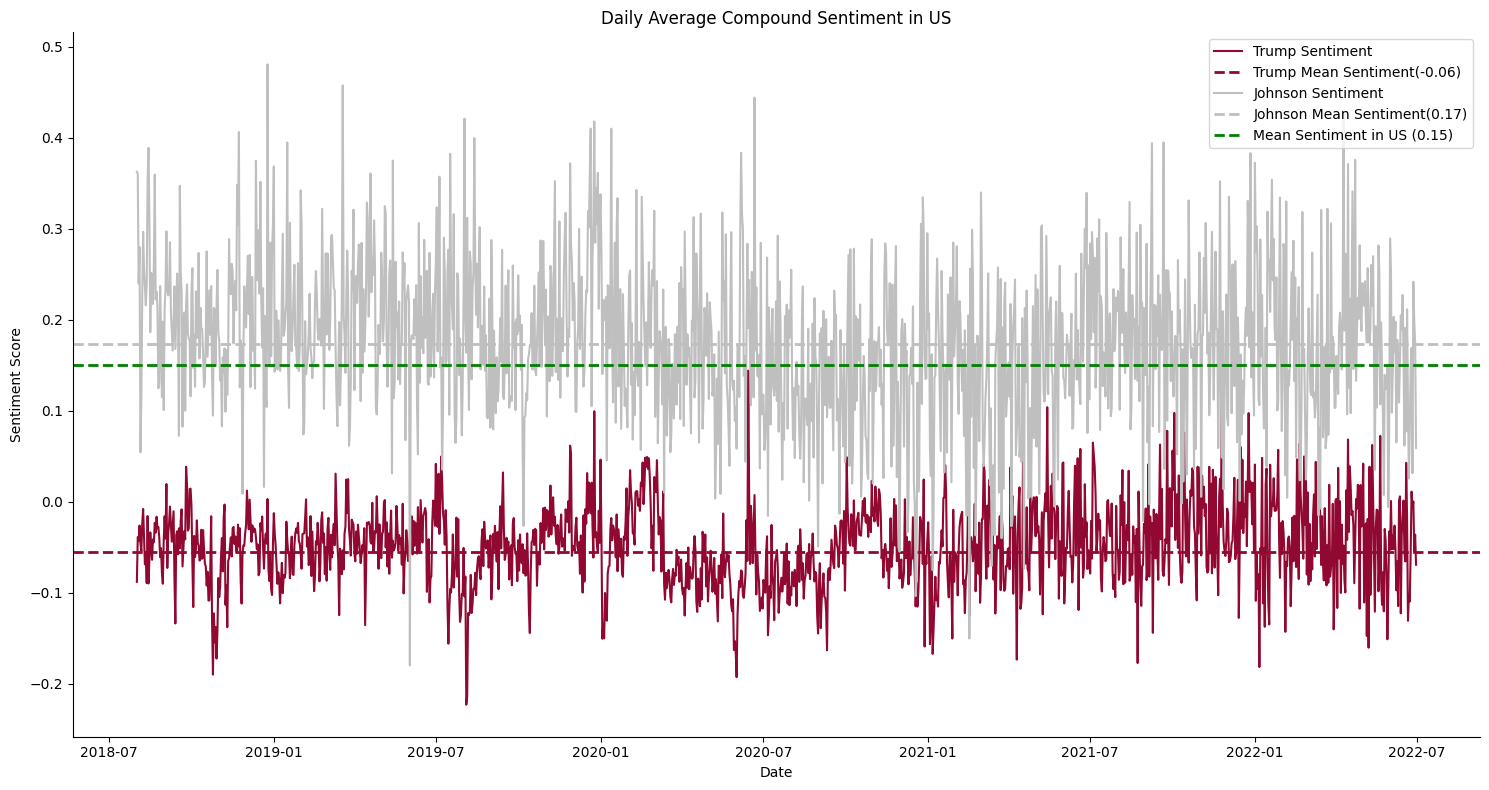

In [ ]:
for location in (cities + countries):
    title = f'Daily Average Compound Sentiment in {location}'
    filepath_trump = f'{data_path}trump-{location}.pkl'
    filepath_johnson = f'{data_path}johnson-{location}.pkl'
    trump = pd.read_pickle(filepath_trump)
    johnson = pd.read_pickle(filepath_johnson)
    trump, trump_daily_sentiment = add_day_and_get_daily_sentiment(trump)
    johnson, johnson_daily_sentiment = add_day_and_get_daily_sentiment(johnson)
    trump_average_compound = get_compound_mean(trump)
    johnson_average_compound = get_compound_mean(johnson)
    presidents_daily_sentiment = trump_daily_sentiment.rename(columns={'Compound': presidents[0]})
    presidents_daily_sentiment[presidents[1]] = johnson_daily_sentiment['Compound']
    
    plot_sentiment_with_highlights_and_timeframes(presidents_daily_sentiment,
                                            title=title,
                                            location=location,
                                            columns=['trump', 'johnson'],
                                            averages=[trump_average_compound, johnson_average_compound],
                                            mean_location=mean_compound.at['All',location],
                                            colors=colors,
                                            save_path=f'visualizations/compound_sentiment/presidents-{location}.png')

In [ ]:
trump_significant_points = {
    'Birmingham': ['2019-10', '2021-05'],
    'London': ['2021-05']
}
johnson_significant_points = {
    'Birmingham': ['2020-08', '2022-04', '2020-04', '2021-02'],
    'NYC': ['2019-12']
}
significant_points = [pd.to_datetime(significant_points).date()]

In [ ]:
def combine_city_sentiments(president):
    city_average_compound = pd.DataFrame(columns=cities, index=['average_compound'])
    city_sentiments = pd.DataFrame(columns=['day'] + cities)

    for location in cities:
        filepath = f'{data_path}{president}-{location}.pkl'
        data = pd.read_pickle(filepath)
        # get mean daily sentiment
        data, daily_sentiment = add_day_and_get_daily_sentiment(data)
        city_sentiments['day'] = daily_sentiment['day']
        city_sentiments[location] = daily_sentiment['Compound']
        # get mean compound sentiment
        average_compound = get_compound_mean(data)
        city_average_compound.at['average_compound', location] = average_compound
    return (city_average_compound, city_sentiments)

In [ ]:
trump_city_sentiments = combine_city_sentiments(presidents[0])
johnson_city_sentiments = combine_city_sentiments(presidents[1])

to be deleted:

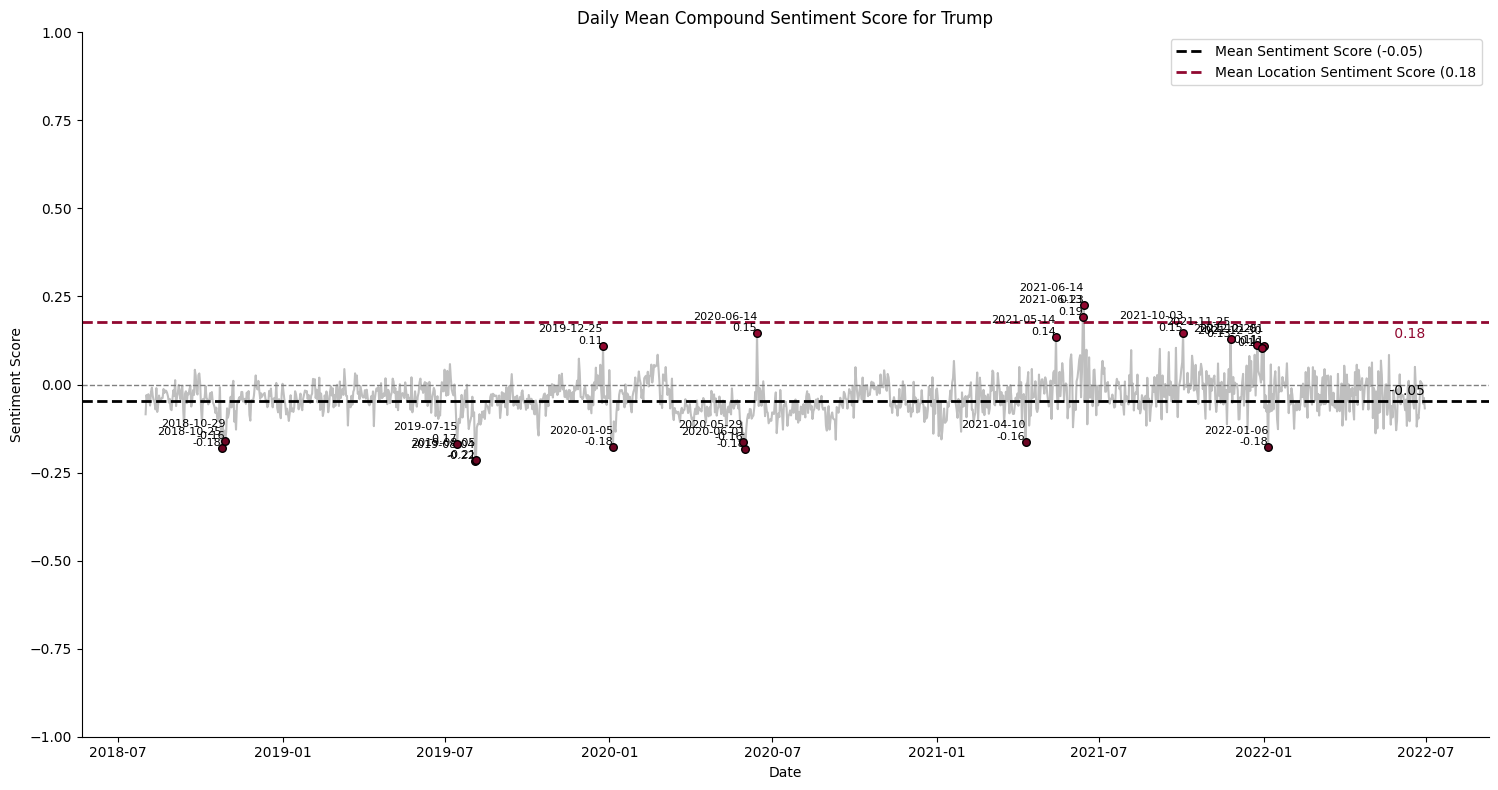

Top Points:
Date: 2021-06-14, Sentiment: 0.23
Date: 2021-06-13, Sentiment: 0.19
Date: 2021-10-03, Sentiment: 0.15
Date: 2020-06-14, Sentiment: 0.15
Date: 2021-05-14, Sentiment: 0.14
Date: 2021-11-25, Sentiment: 0.13
Date: 2021-12-25, Sentiment: 0.11
Date: 2019-12-25, Sentiment: 0.11
Date: 2022-01-01, Sentiment: 0.11
Date: 2021-12-30, Sentiment: 0.10

Bottom Points:
Date: 2019-08-04, Sentiment: -0.22
Date: 2019-08-05, Sentiment: -0.21
Date: 2020-06-01, Sentiment: -0.18
Date: 2018-10-25, Sentiment: -0.18
Date: 2022-01-06, Sentiment: -0.18
Date: 2020-01-05, Sentiment: -0.18
Date: 2019-07-15, Sentiment: -0.17
Date: 2021-04-10, Sentiment: -0.16
Date: 2020-05-29, Sentiment: -0.16
Date: 2018-10-29, Sentiment: -0.16


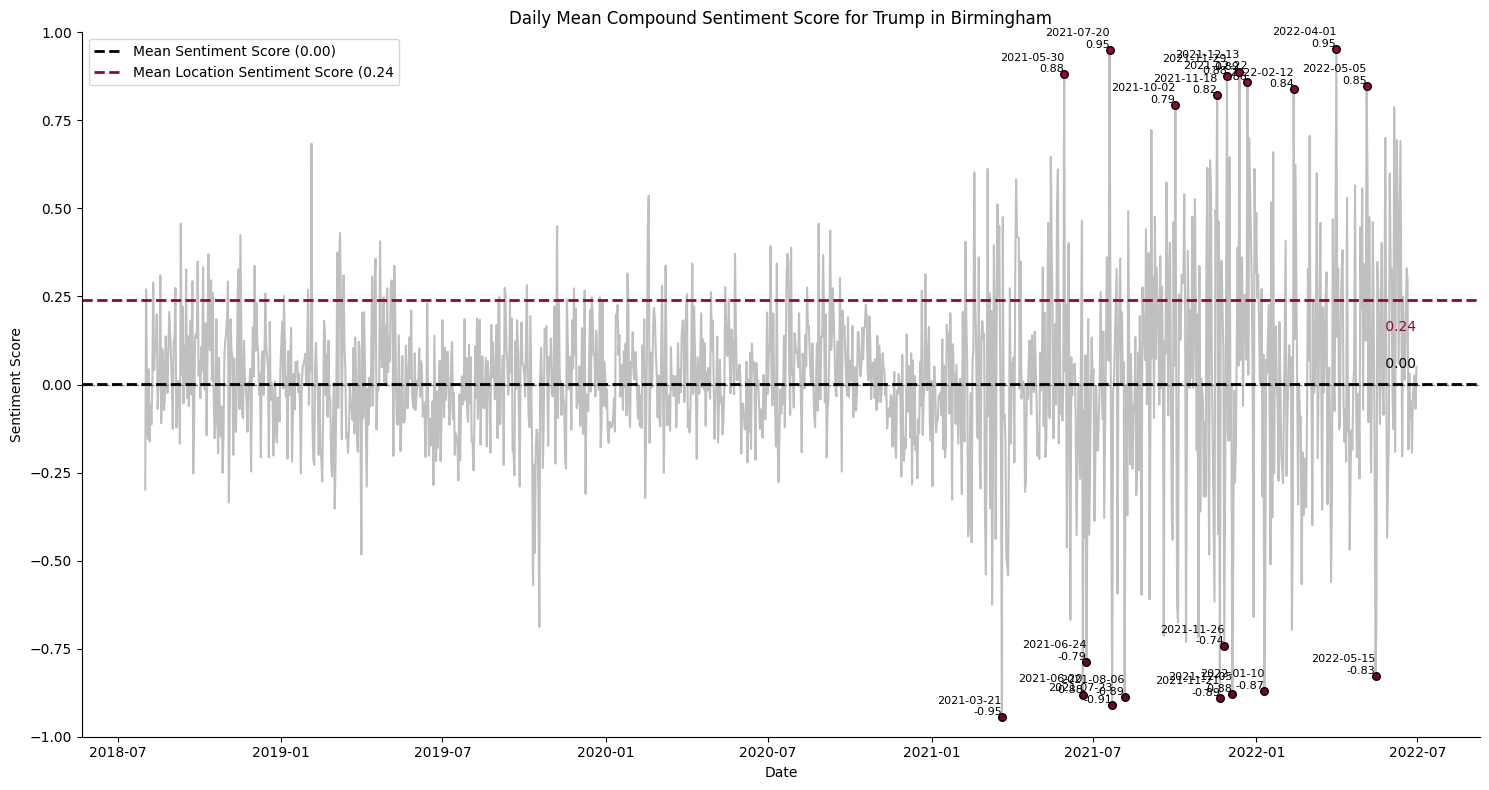

Top Points:
Date: 2022-04-01, Sentiment: 0.95
Date: 2021-07-20, Sentiment: 0.95
Date: 2021-12-13, Sentiment: 0.89
Date: 2021-05-30, Sentiment: 0.88
Date: 2021-11-29, Sentiment: 0.88
Date: 2021-12-22, Sentiment: 0.86
Date: 2022-05-05, Sentiment: 0.85
Date: 2022-02-12, Sentiment: 0.84
Date: 2021-11-18, Sentiment: 0.82
Date: 2021-10-02, Sentiment: 0.79

Bottom Points:
Date: 2021-03-21, Sentiment: -0.95
Date: 2021-07-23, Sentiment: -0.91
Date: 2021-11-21, Sentiment: -0.89
Date: 2021-08-06, Sentiment: -0.89
Date: 2021-06-20, Sentiment: -0.88
Date: 2021-12-05, Sentiment: -0.88
Date: 2022-01-10, Sentiment: -0.87
Date: 2022-05-15, Sentiment: -0.83
Date: 2021-06-24, Sentiment: -0.79
Date: 2021-11-26, Sentiment: -0.74


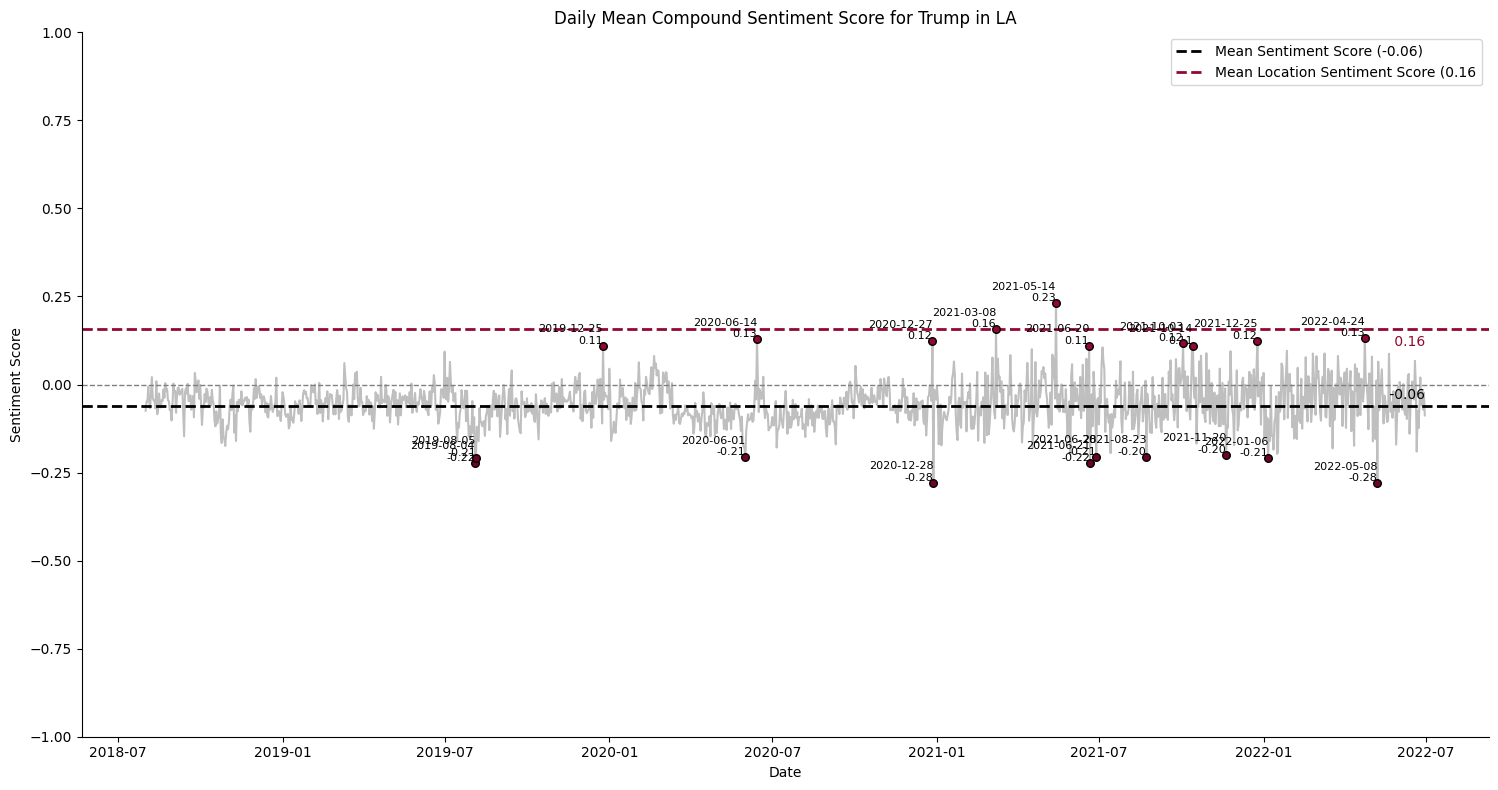

Top Points:
Date: 2021-05-14, Sentiment: 0.23
Date: 2021-03-08, Sentiment: 0.16
Date: 2022-04-24, Sentiment: 0.13
Date: 2020-06-14, Sentiment: 0.13
Date: 2021-12-25, Sentiment: 0.12
Date: 2020-12-27, Sentiment: 0.12
Date: 2021-10-03, Sentiment: 0.12
Date: 2019-12-25, Sentiment: 0.11
Date: 2021-10-14, Sentiment: 0.11
Date: 2021-06-20, Sentiment: 0.11

Bottom Points:
Date: 2022-05-08, Sentiment: -0.28
Date: 2020-12-28, Sentiment: -0.28
Date: 2021-06-21, Sentiment: -0.22
Date: 2019-08-04, Sentiment: -0.22
Date: 2022-01-06, Sentiment: -0.21
Date: 2019-08-05, Sentiment: -0.21
Date: 2020-06-01, Sentiment: -0.21
Date: 2021-06-28, Sentiment: -0.21
Date: 2021-08-23, Sentiment: -0.20
Date: 2021-11-20, Sentiment: -0.20


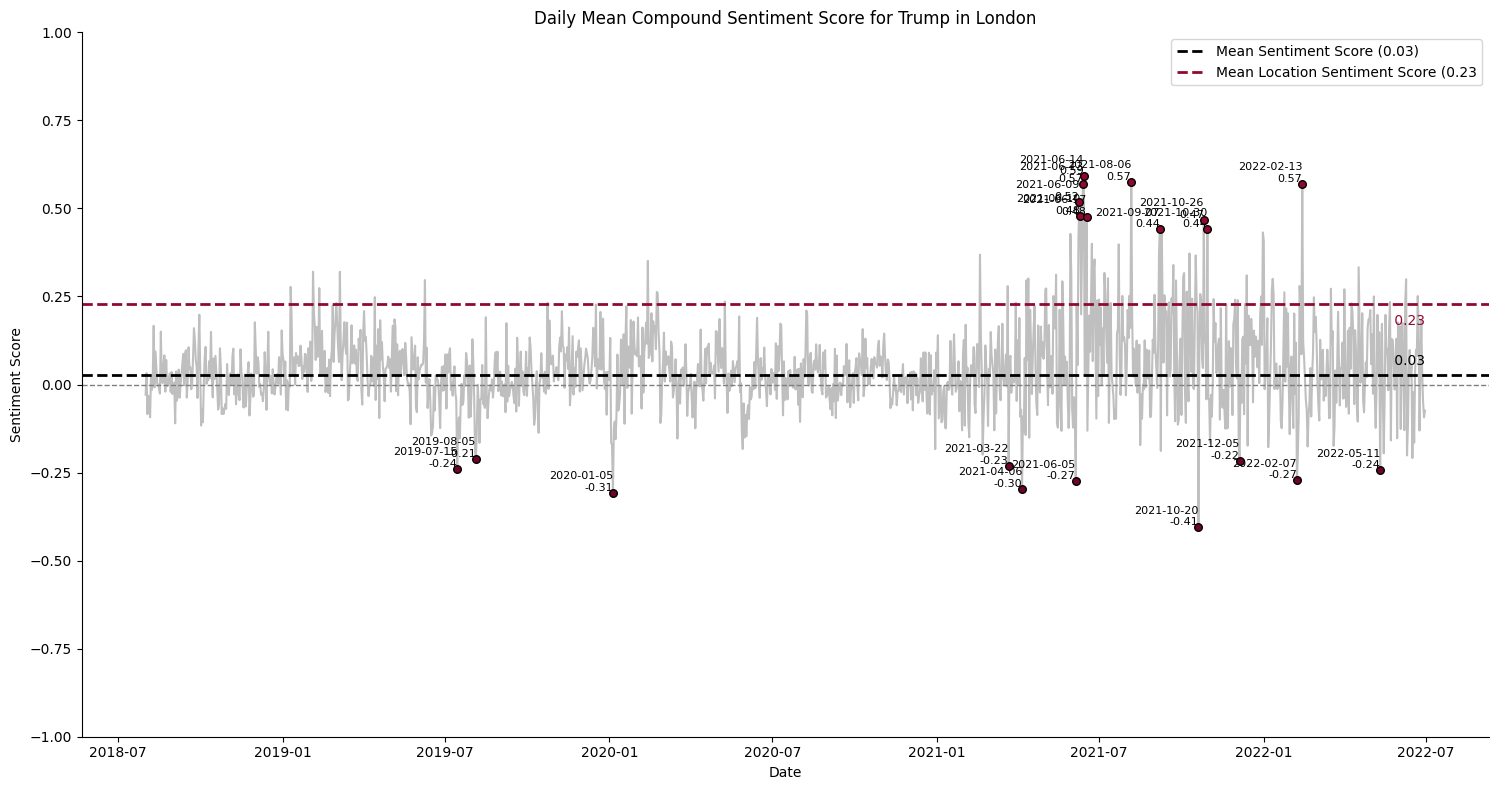

Top Points:
Date: 2021-06-14, Sentiment: 0.59
Date: 2021-08-06, Sentiment: 0.57
Date: 2022-02-13, Sentiment: 0.57
Date: 2021-06-13, Sentiment: 0.57
Date: 2021-06-09, Sentiment: 0.52
Date: 2021-06-10, Sentiment: 0.48
Date: 2021-06-17, Sentiment: 0.48
Date: 2021-10-26, Sentiment: 0.47
Date: 2021-09-07, Sentiment: 0.44
Date: 2021-10-30, Sentiment: 0.44

Bottom Points:
Date: 2021-10-20, Sentiment: -0.41
Date: 2020-01-05, Sentiment: -0.31
Date: 2021-04-06, Sentiment: -0.30
Date: 2021-06-05, Sentiment: -0.27
Date: 2022-02-07, Sentiment: -0.27
Date: 2022-05-11, Sentiment: -0.24
Date: 2019-07-15, Sentiment: -0.24
Date: 2021-03-22, Sentiment: -0.23
Date: 2021-12-05, Sentiment: -0.22
Date: 2019-08-05, Sentiment: -0.21


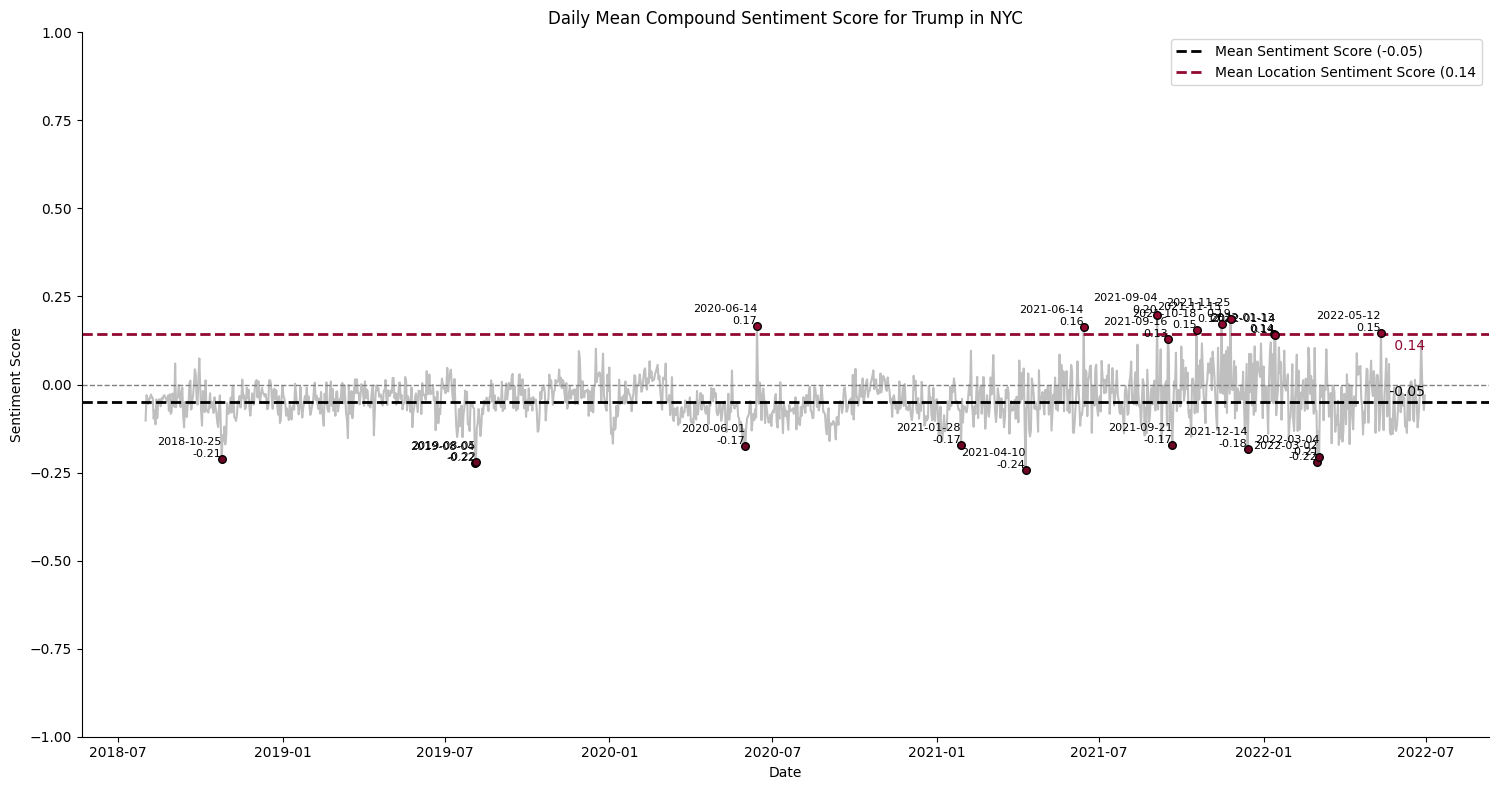

Top Points:
Date: 2021-09-04, Sentiment: 0.20
Date: 2021-11-25, Sentiment: 0.19
Date: 2021-11-15, Sentiment: 0.17
Date: 2020-06-14, Sentiment: 0.17
Date: 2021-06-14, Sentiment: 0.16
Date: 2021-10-18, Sentiment: 0.15
Date: 2022-05-12, Sentiment: 0.15
Date: 2022-01-13, Sentiment: 0.14
Date: 2022-01-14, Sentiment: 0.14
Date: 2021-09-16, Sentiment: 0.13

Bottom Points:
Date: 2021-04-10, Sentiment: -0.24
Date: 2019-08-04, Sentiment: -0.22
Date: 2019-08-05, Sentiment: -0.22
Date: 2022-03-02, Sentiment: -0.22
Date: 2018-10-25, Sentiment: -0.21
Date: 2022-03-04, Sentiment: -0.21
Date: 2021-12-14, Sentiment: -0.18
Date: 2020-06-01, Sentiment: -0.17
Date: 2021-09-21, Sentiment: -0.17
Date: 2021-01-28, Sentiment: -0.17


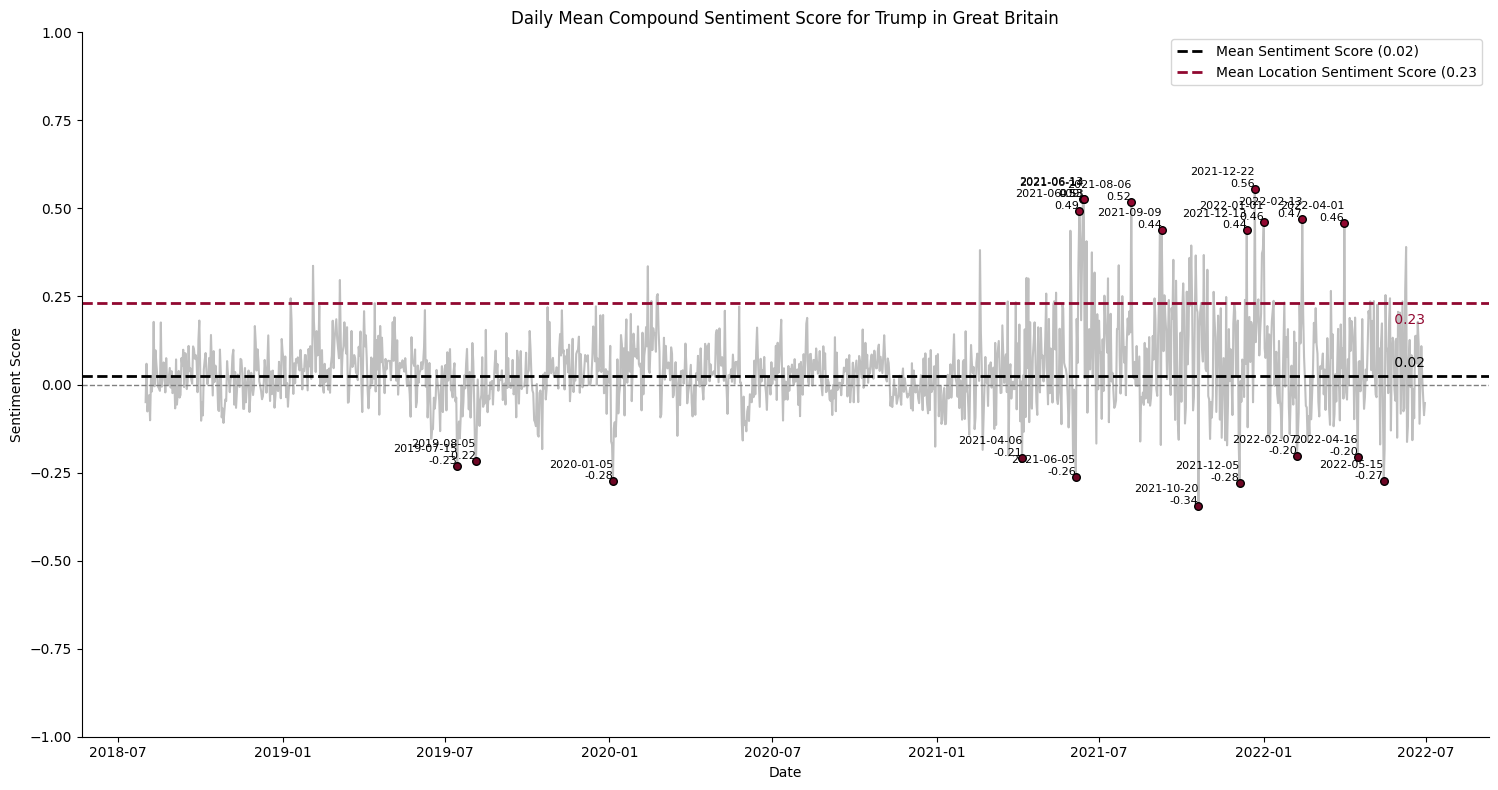

Top Points:
Date: 2021-12-22, Sentiment: 0.56
Date: 2021-06-13, Sentiment: 0.53
Date: 2021-06-14, Sentiment: 0.53
Date: 2021-08-06, Sentiment: 0.52
Date: 2021-06-09, Sentiment: 0.49
Date: 2022-02-13, Sentiment: 0.47
Date: 2022-01-01, Sentiment: 0.46
Date: 2022-04-01, Sentiment: 0.46
Date: 2021-09-09, Sentiment: 0.44
Date: 2021-12-13, Sentiment: 0.44

Bottom Points:
Date: 2021-10-20, Sentiment: -0.34
Date: 2021-12-05, Sentiment: -0.28
Date: 2020-01-05, Sentiment: -0.28
Date: 2022-05-15, Sentiment: -0.27
Date: 2021-06-05, Sentiment: -0.26
Date: 2019-07-15, Sentiment: -0.23
Date: 2019-08-05, Sentiment: -0.22
Date: 2021-04-06, Sentiment: -0.21
Date: 2022-04-16, Sentiment: -0.20
Date: 2022-02-07, Sentiment: -0.20


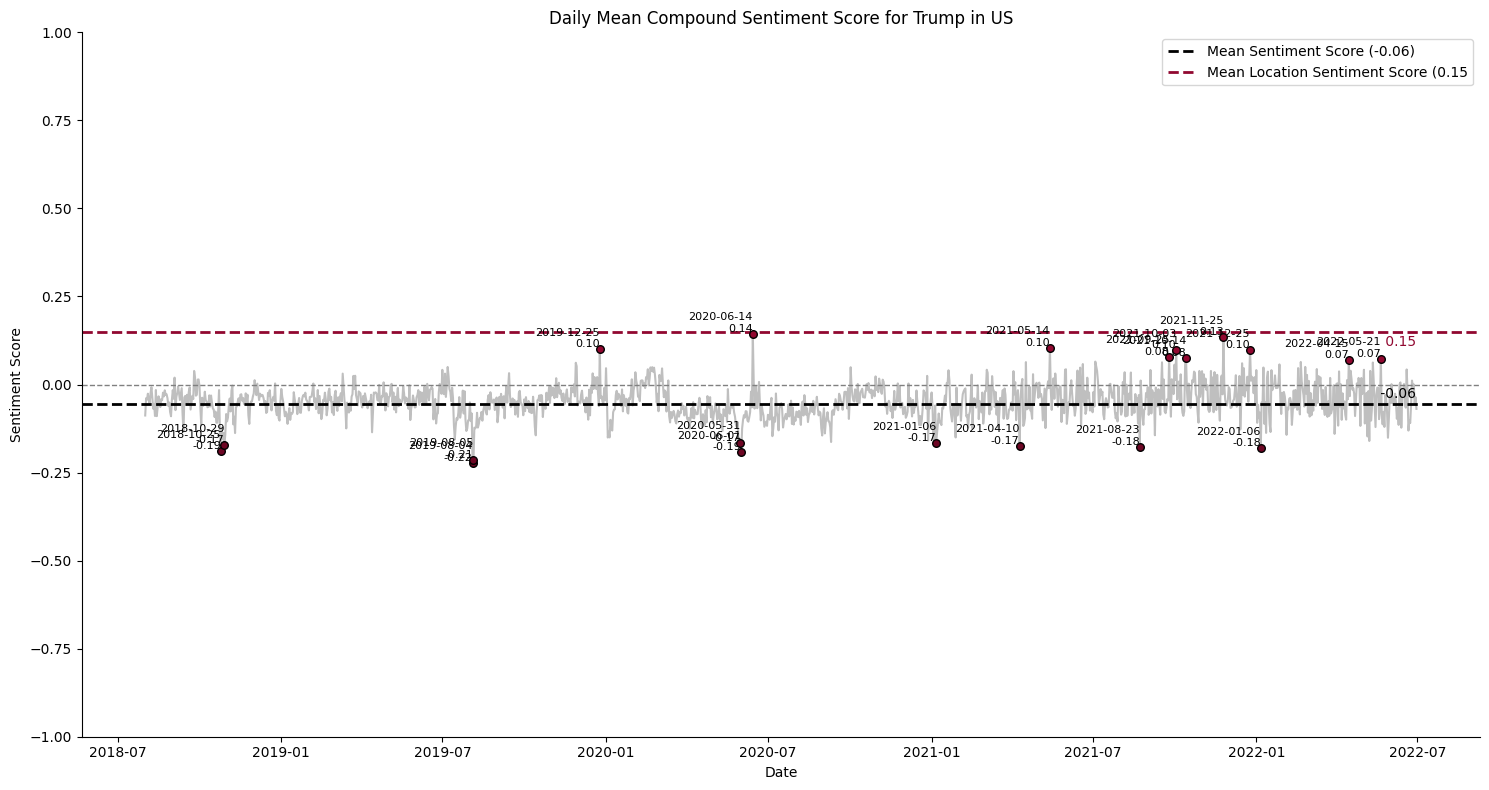

Top Points:
Date: 2020-06-14, Sentiment: 0.14
Date: 2021-11-25, Sentiment: 0.13
Date: 2021-05-14, Sentiment: 0.10
Date: 2019-12-25, Sentiment: 0.10
Date: 2021-10-03, Sentiment: 0.10
Date: 2021-12-25, Sentiment: 0.10
Date: 2021-09-25, Sentiment: 0.08
Date: 2021-10-14, Sentiment: 0.08
Date: 2022-05-21, Sentiment: 0.07
Date: 2022-04-15, Sentiment: 0.07

Bottom Points:
Date: 2019-08-04, Sentiment: -0.22
Date: 2019-08-05, Sentiment: -0.21
Date: 2020-06-01, Sentiment: -0.19
Date: 2018-10-25, Sentiment: -0.19
Date: 2022-01-06, Sentiment: -0.18
Date: 2021-08-23, Sentiment: -0.18
Date: 2021-04-10, Sentiment: -0.17
Date: 2018-10-29, Sentiment: -0.17
Date: 2021-01-06, Sentiment: -0.17
Date: 2020-05-31, Sentiment: -0.17


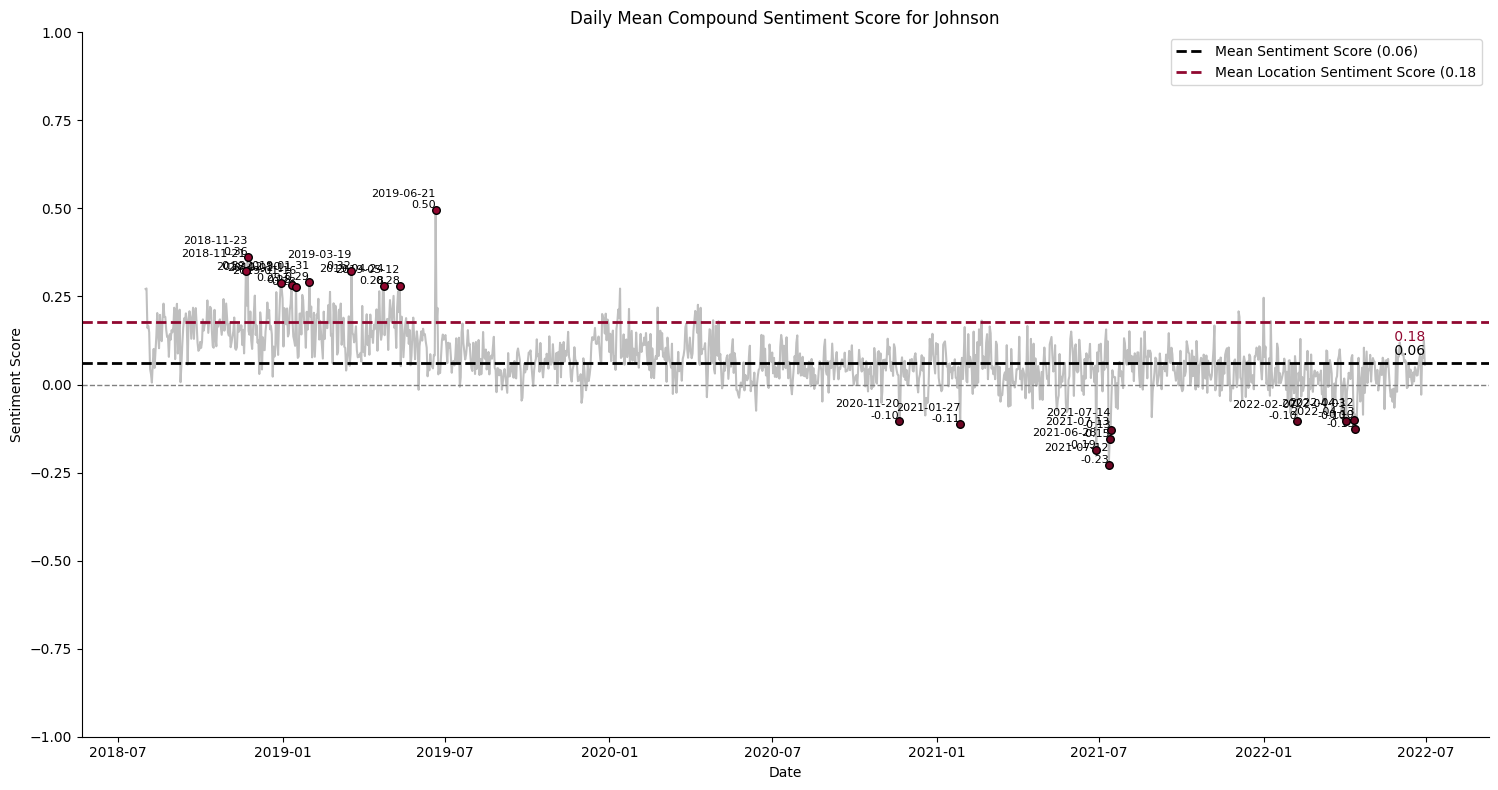

Top Points:
Date: 2019-06-21, Sentiment: 0.50
Date: 2018-11-23, Sentiment: 0.36
Date: 2018-11-21, Sentiment: 0.32
Date: 2019-03-19, Sentiment: 0.32
Date: 2019-01-31, Sentiment: 0.29
Date: 2018-12-30, Sentiment: 0.29
Date: 2019-01-11, Sentiment: 0.28
Date: 2019-04-24, Sentiment: 0.28
Date: 2019-05-12, Sentiment: 0.28
Date: 2019-01-16, Sentiment: 0.28

Bottom Points:
Date: 2021-07-12, Sentiment: -0.23
Date: 2021-06-28, Sentiment: -0.19
Date: 2021-07-13, Sentiment: -0.15
Date: 2021-07-14, Sentiment: -0.13
Date: 2022-04-13, Sentiment: -0.13
Date: 2021-01-27, Sentiment: -0.11
Date: 2022-02-07, Sentiment: -0.10
Date: 2022-04-03, Sentiment: -0.10
Date: 2020-11-20, Sentiment: -0.10
Date: 2022-04-12, Sentiment: -0.10


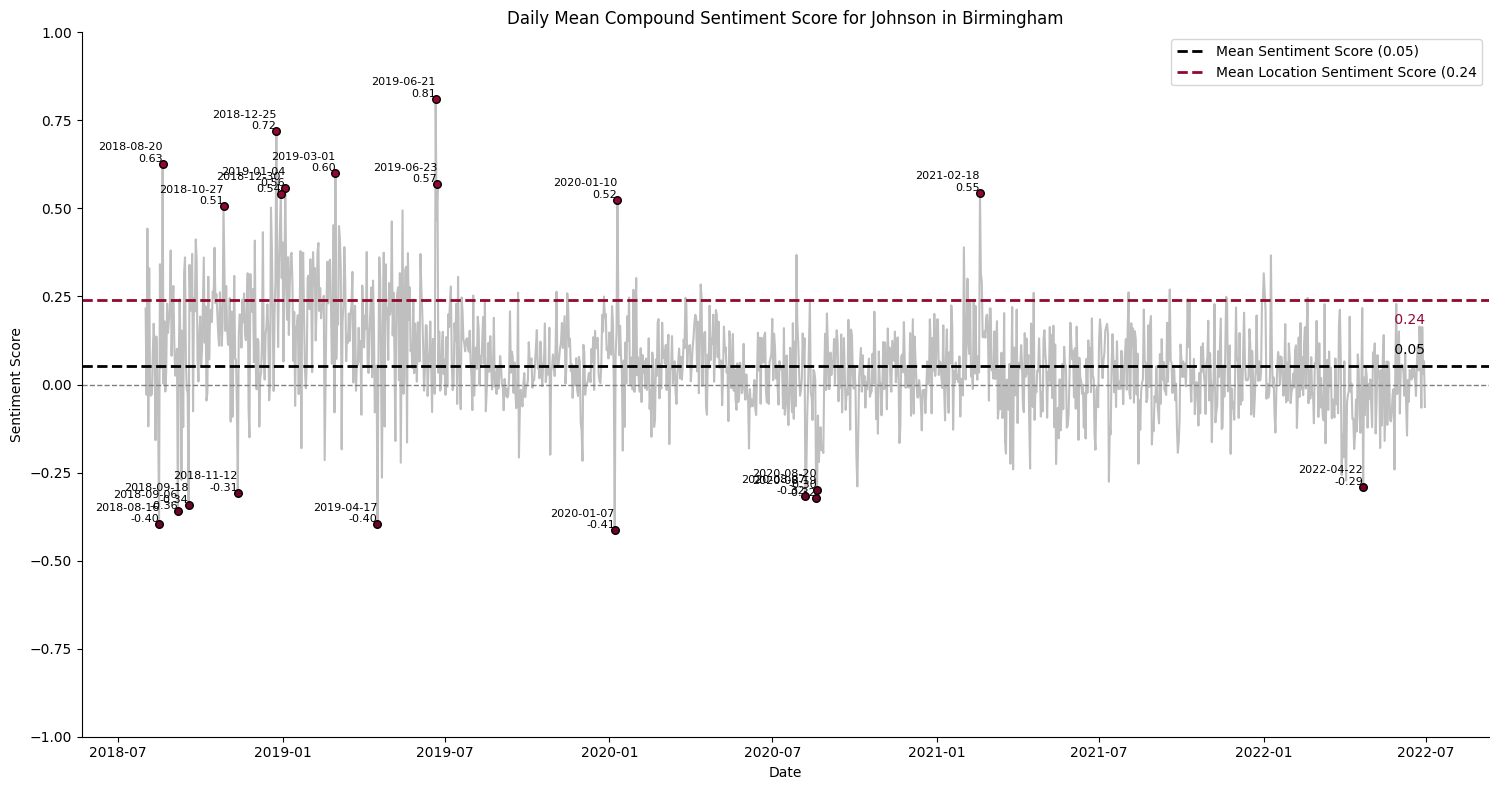

Top Points:
Date: 2019-06-21, Sentiment: 0.81
Date: 2018-12-25, Sentiment: 0.72
Date: 2018-08-20, Sentiment: 0.63
Date: 2019-03-01, Sentiment: 0.60
Date: 2019-06-23, Sentiment: 0.57
Date: 2019-01-04, Sentiment: 0.56
Date: 2021-02-18, Sentiment: 0.55
Date: 2018-12-30, Sentiment: 0.54
Date: 2020-01-10, Sentiment: 0.52
Date: 2018-10-27, Sentiment: 0.51

Bottom Points:
Date: 2020-01-07, Sentiment: -0.41
Date: 2019-04-17, Sentiment: -0.40
Date: 2018-08-16, Sentiment: -0.40
Date: 2018-09-06, Sentiment: -0.36
Date: 2018-09-18, Sentiment: -0.34
Date: 2020-08-19, Sentiment: -0.32
Date: 2020-08-07, Sentiment: -0.32
Date: 2018-11-12, Sentiment: -0.31
Date: 2020-08-20, Sentiment: -0.30
Date: 2022-04-22, Sentiment: -0.29


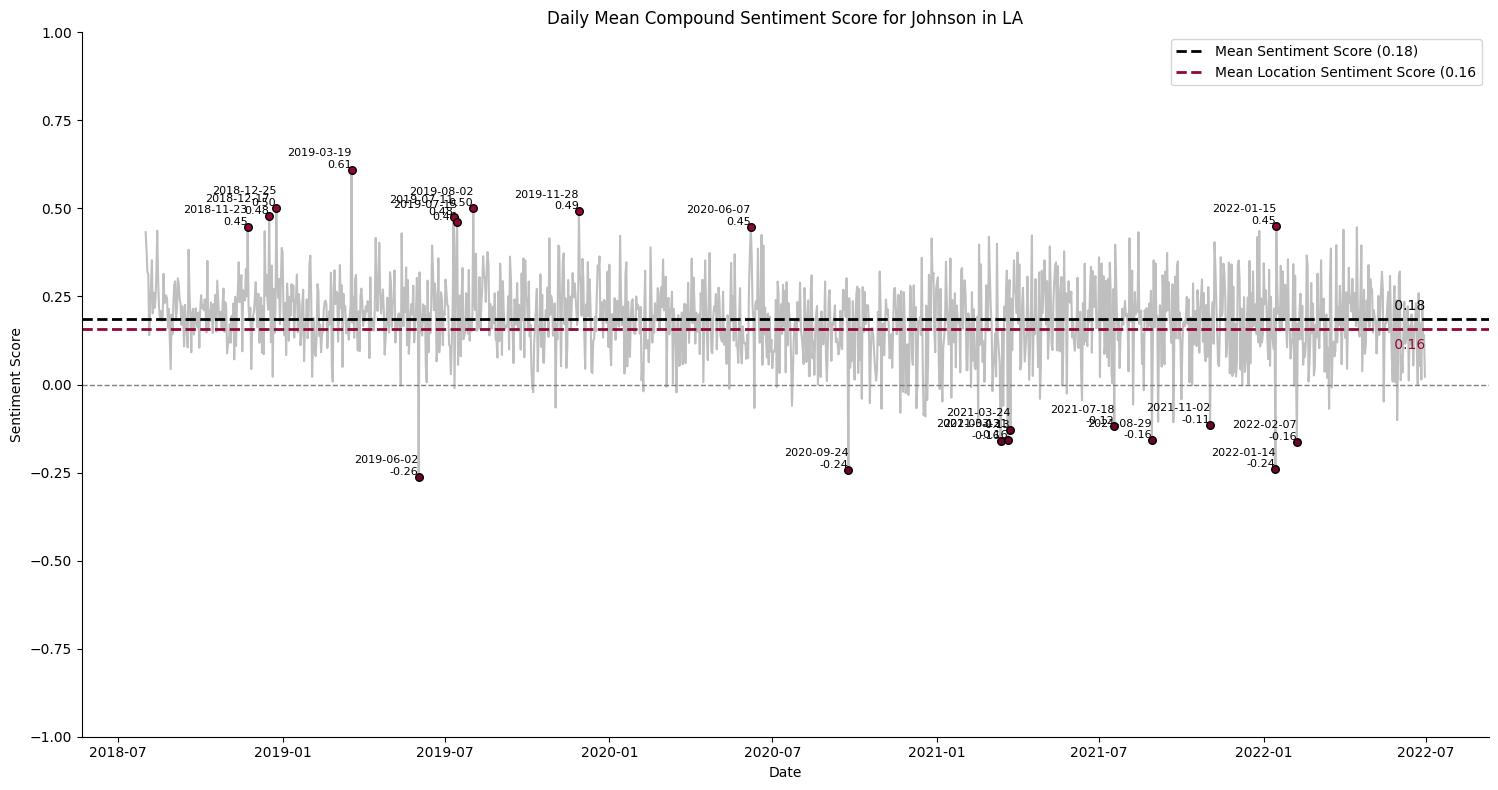

Top Points:
Date: 2019-03-19, Sentiment: 0.61
Date: 2018-12-25, Sentiment: 0.50
Date: 2019-08-02, Sentiment: 0.50
Date: 2019-11-28, Sentiment: 0.49
Date: 2018-12-17, Sentiment: 0.48
Date: 2019-07-11, Sentiment: 0.48
Date: 2019-07-15, Sentiment: 0.46
Date: 2022-01-15, Sentiment: 0.45
Date: 2018-11-23, Sentiment: 0.45
Date: 2020-06-07, Sentiment: 0.45

Bottom Points:
Date: 2019-06-02, Sentiment: -0.26
Date: 2020-09-24, Sentiment: -0.24
Date: 2022-01-14, Sentiment: -0.24
Date: 2022-02-07, Sentiment: -0.16
Date: 2021-03-13, Sentiment: -0.16
Date: 2021-08-29, Sentiment: -0.16
Date: 2021-03-21, Sentiment: -0.16
Date: 2021-03-24, Sentiment: -0.13
Date: 2021-07-18, Sentiment: -0.12
Date: 2021-11-02, Sentiment: -0.11


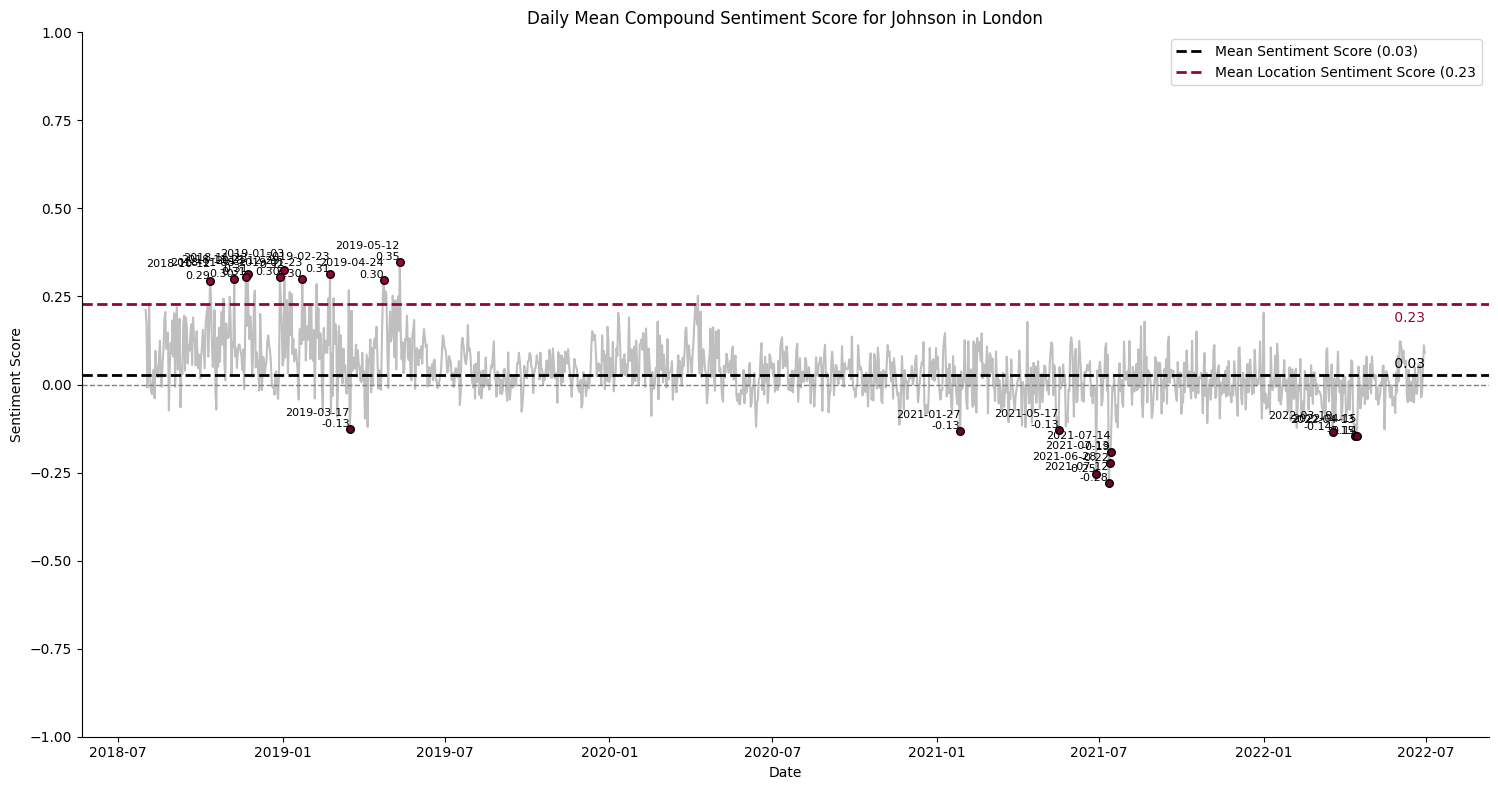

Top Points:
Date: 2019-05-12, Sentiment: 0.35
Date: 2019-01-03, Sentiment: 0.32
Date: 2019-02-23, Sentiment: 0.31
Date: 2018-11-23, Sentiment: 0.31
Date: 2018-11-21, Sentiment: 0.31
Date: 2018-12-29, Sentiment: 0.30
Date: 2019-01-23, Sentiment: 0.30
Date: 2018-11-08, Sentiment: 0.30
Date: 2019-04-24, Sentiment: 0.30
Date: 2018-10-12, Sentiment: 0.29

Bottom Points:
Date: 2021-07-12, Sentiment: -0.28
Date: 2021-06-28, Sentiment: -0.25
Date: 2021-07-13, Sentiment: -0.22
Date: 2021-07-14, Sentiment: -0.19
Date: 2022-04-13, Sentiment: -0.15
Date: 2022-04-15, Sentiment: -0.14
Date: 2022-03-19, Sentiment: -0.14
Date: 2021-01-27, Sentiment: -0.13
Date: 2021-05-17, Sentiment: -0.13
Date: 2019-03-17, Sentiment: -0.13


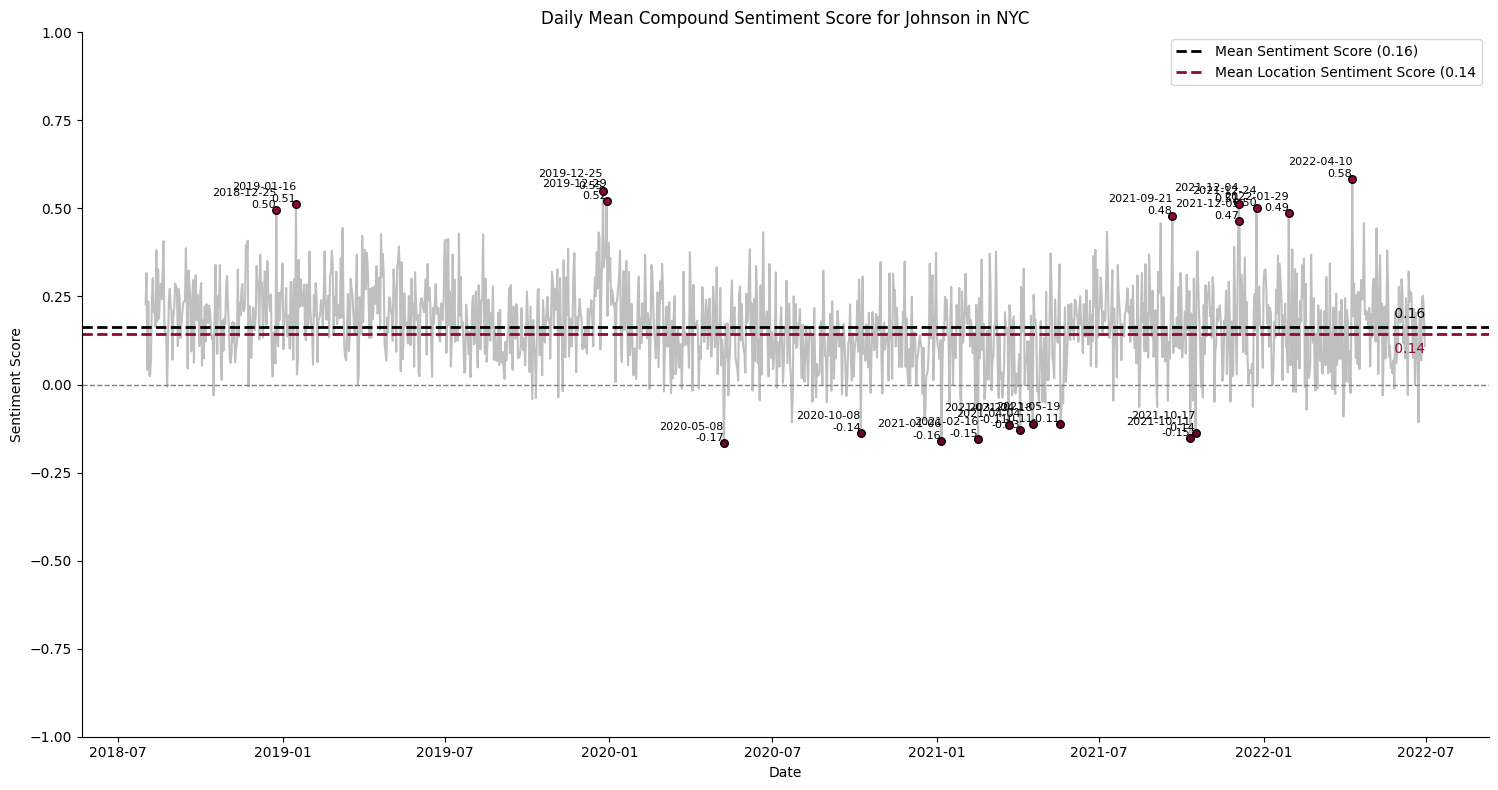

Top Points:
Date: 2022-04-10, Sentiment: 0.58
Date: 2019-12-25, Sentiment: 0.55
Date: 2019-12-29, Sentiment: 0.52
Date: 2019-01-16, Sentiment: 0.51
Date: 2021-12-04, Sentiment: 0.51
Date: 2021-12-24, Sentiment: 0.50
Date: 2018-12-25, Sentiment: 0.50
Date: 2022-01-29, Sentiment: 0.49
Date: 2021-09-21, Sentiment: 0.48
Date: 2021-12-05, Sentiment: 0.47

Bottom Points:
Date: 2020-05-08, Sentiment: -0.17
Date: 2021-01-06, Sentiment: -0.16
Date: 2021-02-16, Sentiment: -0.15
Date: 2021-10-11, Sentiment: -0.15
Date: 2021-10-17, Sentiment: -0.14
Date: 2020-10-08, Sentiment: -0.14
Date: 2021-04-04, Sentiment: -0.13
Date: 2021-03-22, Sentiment: -0.11
Date: 2021-04-18, Sentiment: -0.11
Date: 2021-05-19, Sentiment: -0.11


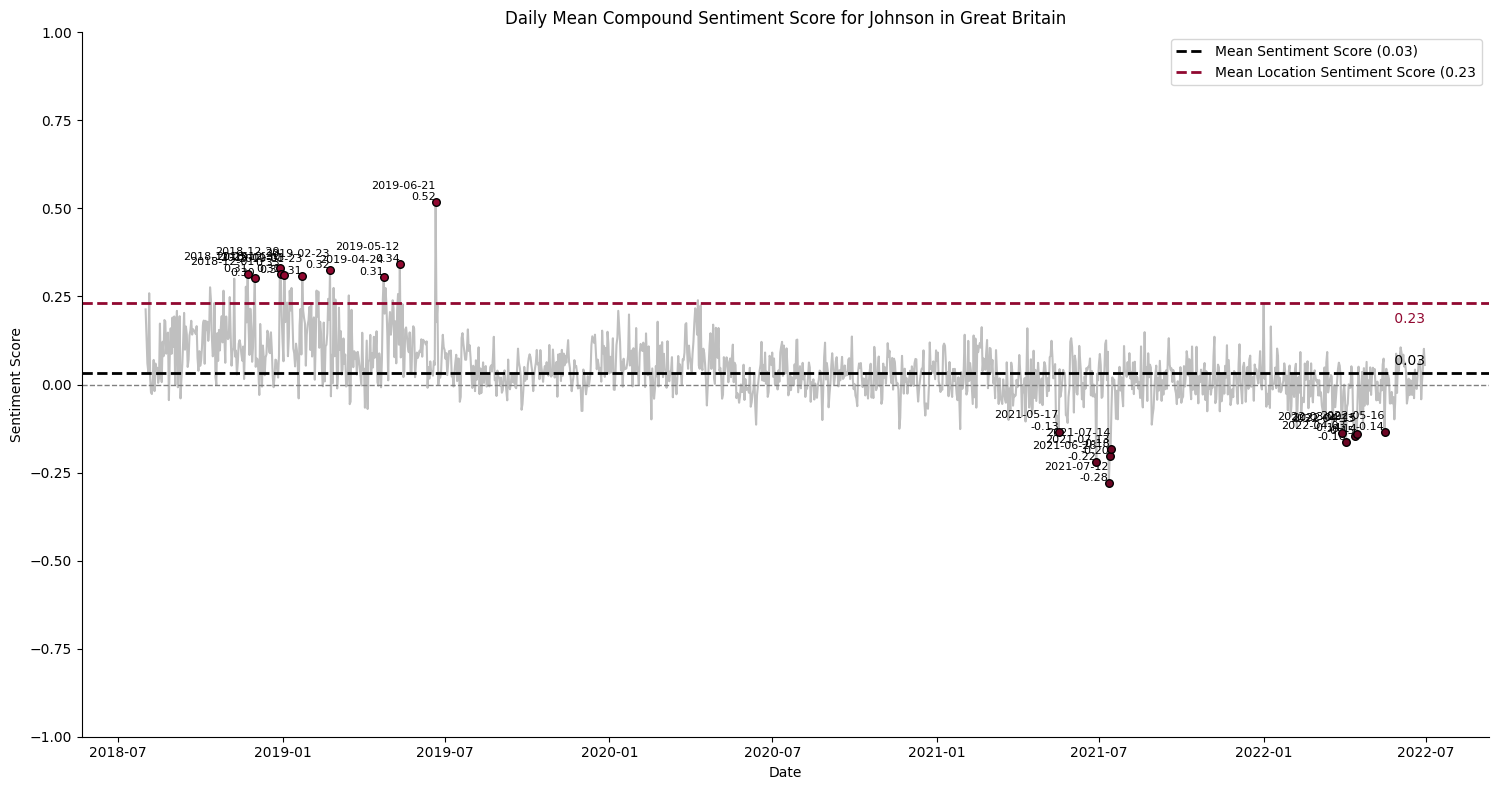

Top Points:
Date: 2019-06-21, Sentiment: 0.52
Date: 2019-05-12, Sentiment: 0.34
Date: 2018-12-29, Sentiment: 0.33
Date: 2019-02-23, Sentiment: 0.32
Date: 2018-12-30, Sentiment: 0.31
Date: 2018-11-23, Sentiment: 0.31
Date: 2019-01-03, Sentiment: 0.31
Date: 2019-01-23, Sentiment: 0.31
Date: 2019-04-24, Sentiment: 0.31
Date: 2018-12-01, Sentiment: 0.30

Bottom Points:
Date: 2021-07-12, Sentiment: -0.28
Date: 2021-06-28, Sentiment: -0.22
Date: 2021-07-13, Sentiment: -0.20
Date: 2021-07-14, Sentiment: -0.18
Date: 2022-04-03, Sentiment: -0.16
Date: 2022-04-13, Sentiment: -0.15
Date: 2022-04-15, Sentiment: -0.14
Date: 2022-03-29, Sentiment: -0.14
Date: 2022-05-16, Sentiment: -0.14
Date: 2021-05-17, Sentiment: -0.13


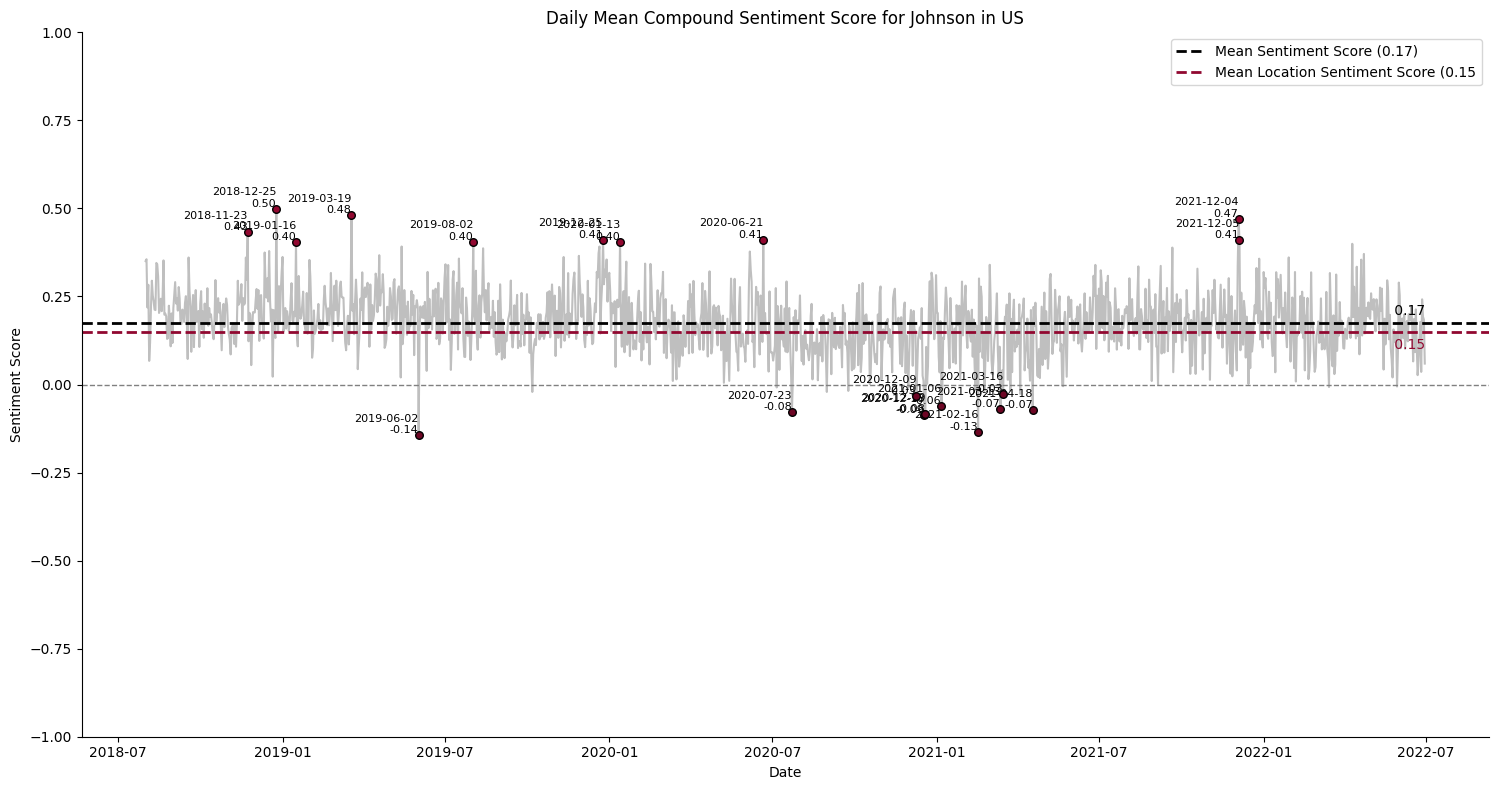

Top Points:
Date: 2018-12-25, Sentiment: 0.50
Date: 2019-03-19, Sentiment: 0.48
Date: 2021-12-04, Sentiment: 0.47
Date: 2018-11-23, Sentiment: 0.43
Date: 2019-12-25, Sentiment: 0.41
Date: 2020-06-21, Sentiment: 0.41
Date: 2021-12-05, Sentiment: 0.41
Date: 2019-08-02, Sentiment: 0.40
Date: 2020-01-13, Sentiment: 0.40
Date: 2019-01-16, Sentiment: 0.40

Bottom Points:
Date: 2019-06-02, Sentiment: -0.14
Date: 2021-02-16, Sentiment: -0.13
Date: 2020-12-18, Sentiment: -0.09
Date: 2020-12-19, Sentiment: -0.08
Date: 2020-07-23, Sentiment: -0.08
Date: 2021-04-18, Sentiment: -0.07
Date: 2021-03-13, Sentiment: -0.07
Date: 2021-01-06, Sentiment: -0.06
Date: 2020-12-09, Sentiment: -0.03
Date: 2021-03-16, Sentiment: -0.03


In [ ]:
for president in presidents:
    # get sentiment development regardless of location
    data = pd.read_pickle(f'{data_path}{president}.pkl')
    data, daily_sentiment = add_day_and_get_daily_sentiment(data)
    average_compound = get_compound_mean(data)
    top_points, bottom_points = plot_sentiment_with_highlights_and_timeframes(daily_sentiment,
                                            title = f'Daily Mean Compound Sentiment Score for {president.capitalize()}',
                                            colors=colors,
                                            average_compound=average_compound,
                                            mean_location=mean_compound.at['All','Total'],
                                            save_path=f'visualizations/compound_sentiment/outliers/{president}.png')
    print_outliers(top_points, bottom_points)
    # get location-specific sentiment development
    for location in (cities + countries):
        data = pd.read_pickle(f'{data_path}{president}-{location}.pkl')
        data, daily_sentiment = add_day_and_get_daily_sentiment(data)
        average_compound = get_compound_mean(data)
        top_points, bottom_points = plot_sentiment_with_highlights_and_timeframes(daily_sentiment,
                                                title = f'Daily Mean Compound Sentiment Score for {president.capitalize()} in {location}',
                                                colors=colors,
                                                average_compound=average_compound,
                                                mean_location=mean_compound.at['All',location],
                                                save_path=f'visualizations/compound_sentiment/outliers/{president}-{location}.png')
        print_outliers(top_points, bottom_points)